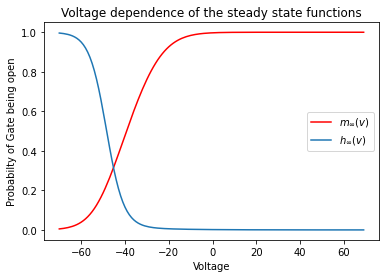

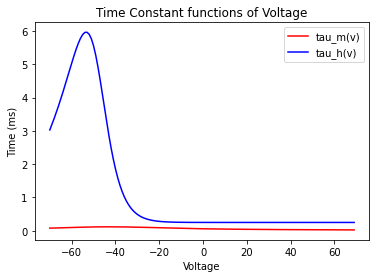

In [1]:
from numpy import exp
import matplotlib.pyplot as plt

def alpha_m(v):
    if v == -52:
        return 0.32*(v+0.01 + 52) / (1 - exp(-(v+0.01 + 52)/4))
    else:
        return 0.32*(v + 52) / (1 - exp(-(v + 52)/4))

def beta_m(v):
    if v == -25:
        return 0.28*(v+0.01 + 25)/(exp((v+0.01 + 25)/5) - 1)
    else:
        return 0.28*(v + 25)/(exp((v + 25)/5) - 1)

def alpha_h(v):
    return 0.128*exp((-(v + 53)/18))

def beta_h(v):
    return 4 / (1 + exp(-(v + 30)/5))

def m_inf(v):
    output = []
    for i in v:
        x_inf = alpha_m(i) / (alpha_m(i) + beta_m(i))
        output.append(x_inf)
    return output

def h_inf(v):
    output = []
    for i in v:
        x_inf = alpha_h(i) / (alpha_h(i) + beta_h(i))
        output.append(x_inf)
    return output

v = [i for i in range(-70, 70)]

def tau_m(v):
    output = []
    for i in v:
        tau_m =  1 / (alpha_m(i) + beta_m(i))
        output.append(tau_m)
    return output

def tau_h(v):
    output = []
    for i in v:
        tau_h =  1 / (alpha_h(i) + beta_h(i))
        output.append(tau_h)
    return output


plt.figure()
plt.plot(v, m_inf(v), 'r', label = '$m_{\infty}(v)$')
plt.plot(v, h_inf(v), label = '$h_{\infty}(v)$')
plt.title('Voltage dependence of the steady state functions')
plt.xlabel('Voltage')
plt.ylabel('Probabilty of Gate being open')
plt.legend()
plt.show()

plt.figure()
plt.plot(v, tau_m(v), 'r', label = 'tau_m(v)')
plt.plot(v, tau_h(v), 'b', label = 'tau_h(v)')
plt.title('Time Constant functions of Voltage')
plt.xlabel('Voltage')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()


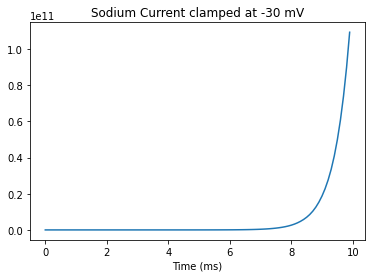

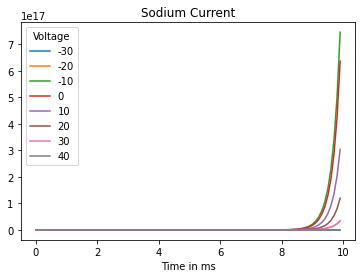

In [27]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def m_prime(m, v):
    dmdt = alpha_m(v)*(1-m) + beta_m(v)*m
    return dmdt

def h_prime(h, v):
    dhdt = alpha_h(v)*(1-h) + beta_h(v)*h
    return dhdt

V = [i for i in range(-30, 50, 10)]

def I_v(t, v):
    F = lambda t, m: alpha_m(v)*(1-m) + beta_m(v)*m
    G = lambda t, h: alpha_h(v)*(1-h) + beta_h(v)*h
    m = solve_ivp(F, [0, 10], [0], t_eval=t)
    h = solve_ivp(G, [0, 10], [0], t_eval=t)
    x = list(zip(m.y[0], h.y[0]))

    I_na = 100*m.y[0]**3*h.y[0]*(40 - v)
    # output = []
    # for i, j in  x:
    #     I_na = 100*i**3*j*(v - 40)
    #     output.append(I_na)

    return I_na

t = np.arange(0,10, 0.1)
plt.figure()
plt.plot(t, I_v(t, -30))
plt.title('Sodium Current clamped at -30 mV')
plt.xlabel('Time (ms)')
plt.show()

x = []
y = []
for v in V:
    F = lambda t, m: alpha_m(v)*(1-m) + beta_m(v)*m
    G = lambda t, h: alpha_h(v)*(1-h) + beta_h(v)*h
    m = solve_ivp(F, [0, 10], [0], t_eval=t)
    h = solve_ivp(G, [0, 10], [0], t_eval=t)
    I_na = 70*m.y[0]**2*h.y[0]*(40 - v)
    x.append(m.t.tolist()); y.append(I_na.tolist())

for i in range(len(x)):
    plt.xlabel('Time in ms')
    plt.title('Sodium Current')
    plt.plot(x[i],y[i])
    plt.legend(V, title = 'Voltage')